<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(1_2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_1.2'

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.633334,33.734233,84.260308,11.086369,222.714243,214.089837,8.624406
1,0.0,1.0,60.323686,68.860265,73.123589,-6.197590,206.109950,212.197484,-6.087534
2,0.0,2.0,32.141175,45.491152,86.561081,0.607265,174.800673,173.996571,0.804102
3,0.0,3.0,72.880381,21.200705,83.227093,-10.605430,176.702749,189.657437,-12.954688
4,0.0,4.0,20.759071,81.147665,88.173902,-25.138337,174.942302,198.248237,-23.305935
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,96.373498,34.297171,42.241538,-4.744698,178.167509,183.053206,-4.885697
249996,999.0,246.0,98.493450,47.222002,46.196062,2.681844,204.593357,201.681190,2.912167
249997,999.0,247.0,36.332791,38.747684,82.707809,14.428103,182.216388,167.009336,15.207052
249998,999.0,248.0,38.725677,45.879204,35.021734,3.424839,133.051454,127.003114,6.048340


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    83.633334  33.734233  84.260308  11.086369  222.714243   
      1.0    60.323686  68.860265  73.123589  -6.197590  206.109950   
      2.0    32.141175  45.491152  86.561081   0.607265  174.800673   
      3.0    72.880381  21.200705  83.227093 -10.605430  176.702749   
      4.0    20.759071  81.147665  88.173902 -25.138337  174.942302   
...                ...        ...        ...        ...         ...   
999.0 245.0  96.373498  34.297171  42.241538  -4.744698  178.167509   
      246.0  98.493450  47.222002  46.196062   2.681844  204.593357   
      247.0  36.332791  38.747684  82.707809  14.428103  182.216388   
      248.0  38.725677  45.879204  35.021734   3.424839  133.051454   
      249.0  84.207032  49.957643  97.038975   1.990327  243.193977   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    214.089837   8.624406  
      1.0    212.197484  -6.087534  
      2.0    173.996571   0.804102  
      3.0    189.657437 -12.954688  
      4.0    198.248237 -23.305935  
...                 ...        ...  
999.0 245.0  183.053206  -4.885697  
      246.0  201.681190   2.912167  
      247.0  167.009336  15.207052  
      248.0  127.003114   6.048340  
      249.0  242.069647   1.124331  

[250000 rows x 7 columns]

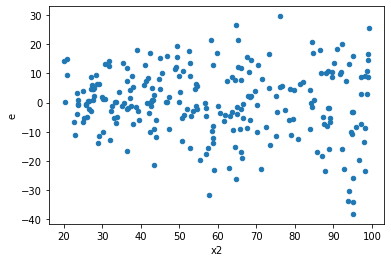

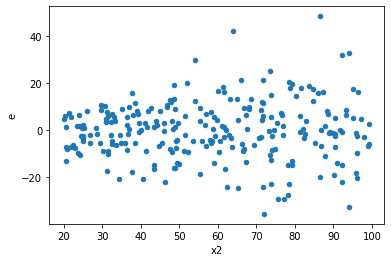

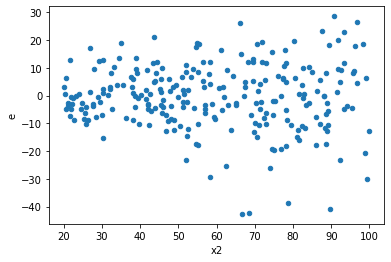

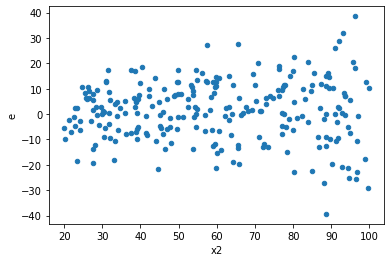

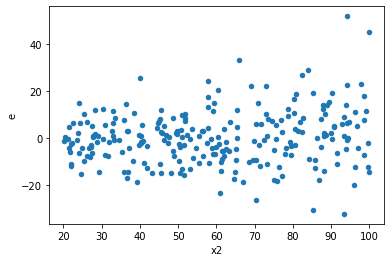

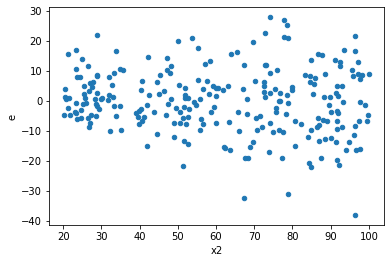

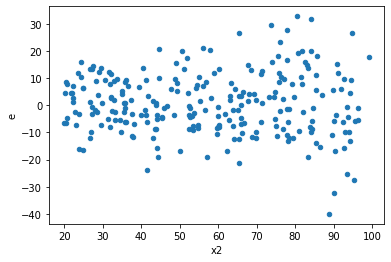

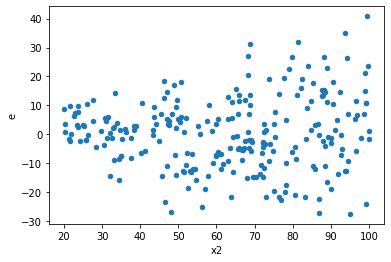

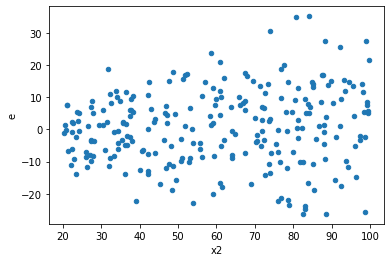

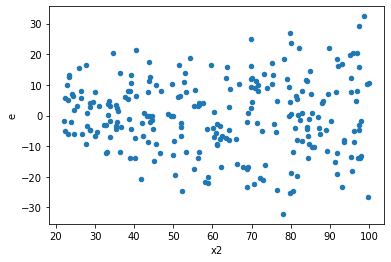

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,115.0,129.0,11008.800458876152,18934.77751220043,95.72869964240132,146.78122102480955,1.5333042397224357,0.01847398343370288,0.9907630082831486,0.00923699171685144,Reject005=0 : Heteroscedasticity
1.0,124.0,120.0,12814.141363477276,22256.120615525553,103.3398497054619,185.4676717960463,1.7947352577409799,0.0014009367308660536,0.999299531634567,0.0007004683654330268,Reject005=0 : Heteroscedasticity
2.0,123.0,121.0,13999.283627111967,19475.568386295465,113.81531404156071,160.95511063054104,1.414177977594182,0.05694043061978049,0.9715297846901098,0.028470215309890246,Reject005=1 : Homoscedasticity
6.0,115.0,129.0,13057.60143967521,17894.178503046845,113.54436034500183,138.71456203912282,1.2216772512315182,0.26857193888594644,0.8657140305570268,0.13428596944297322,Reject005=1 : Homoscedasticity
7.0,141.0,103.0,18176.90907831628,15967.235721827157,128.91424878238496,155.02170603715686,1.2025180110139948,0.3226702938331574,0.8386648530834213,0.1613351469165787,Reject005=1 : Homoscedasticity
10.0,126.0,118.0,14618.923071788926,18560.37675516953,116.02319898245179,157.2913284336401,1.3556886020478545,0.0952540617847275,0.9523729691076362,0.04762703089236375,Reject005=1 : Homoscedasticity
11.0,135.0,109.0,18490.00635186359,18410.118775730396,136.96301001380436,168.9001722544073,1.2331809313871243,0.25561090684341625,0.8721945465782919,0.12780545342170813,Reject005=1 : Homoscedasticity
12.0,116.0,128.0,11997.714188676257,21502.28290206533,103.42857059203669,167.9865851723854,1.6241797040296642,0.007576885870423045,0.9962115570647885,0.0037884429352115223,Reject005=0 : Heteroscedasticity
14.0,135.0,109.0,10750.394320383492,21073.05055624154,79.63255052135919,193.3307390480875,2.427785343836651,2.5050162162365552e-06,0.9999987474918919,1.2525081081182776e-06,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,115.0,129.0,11008.800458876152,18934.77751220043,95.72869964240132,146.78122102480955,1.5333042397224357,0.01847398343370288,Reject005=0 : Heteroscedasticity
1.0,124.0,120.0,12814.141363477276,22256.120615525553,103.3398497054619,185.4676717960463,1.7947352577409799,0.0014009367308660536,Reject005=0 : Heteroscedasticity
2.0,123.0,121.0,13999.283627111967,19475.568386295465,113.81531404156071,160.95511063054104,1.414177977594182,0.05694043061978049,Reject005=1 : Homoscedasticity
3.0,119.0,125.0,22179.11761339823,11354.155050112447,186.3791396083885,90.83324040089958,0.48735733297060135,9.377047105392357e-05,Reject005=0 : Heteroscedasticity
4.0,102.0,142.0,20708.37726140353,14864.888751923605,203.02330648434832,104.68231515439159,0.5156172311796225,0.00046872888932141877,Reject005=0 : Heteroscedasticity
5.0,123.0,121.0,16673.27263701238,14100.948376114018,135.55506208953153,116.53676343895883,0.8597005647932832,0.40461665111588724,Reject005=1 : Homoscedasticity
6.0,115.0,129.0,13057.60143967521,17894.178503046845,113.54436034500183,138.71456203912282,1.2216772512315182,0.26857193888594644,Reject005=1 : Homoscedasticity
7.0,141.0,103.0,18176.90907831628,15967.235721827157,128.91424878238496,155.02170603715686,1.2025180110139948,0.3226702938331574,Reject005=1 : Homoscedasticity
8.0,125.0,119.0,16637.268734260833,12002.405744980342,133.09814987408666,100.8605524788264,0.7577907925410111,0.12629244268554643,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    641
Reject005=1 : Homoscedasticity      359
Name: Result_test, dtype: int64